# Lab 4 Sample Code

In [218]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(x):
    """Sigmoid function.
    This function accepts any shape of np.ndarray object as input and perform sigmoid operation.
    """
    return 1 / (1 + np.exp(-x))


def der_sigmoid(y):
    """First derivative of Sigmoid function.
    The input to this function should be the value that output from sigmoid function.
    """
    return y * (1 - y)

def relu(x):
    return np.maximum(0, x)

def der_relu(x):
    return np.where(x > 0, 1, 0)

class GenData:
    @staticmethod
    def _gen_linear(n=100):
        """Data generation (Linear)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        pos = np.array([(np.random.random(), np.random.random()) for i in range(n)])
        x, y = pos[:, 0], pos[:, 1]
        return pos, (x > y).astype(np.int64).reshape((-1, 1))

    @staticmethod
    def _gen_xor(n=100):
        """Data generation (XOR)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        data_x = np.linspace(0, 1, n // 2)

        inputs = []
        labels = []

        for x in data_x:
            inputs.append([x, x])
            labels.append(0)

            if x == 1 - x:
                continue

            inputs.append([x, 1 - x])
            labels.append(1)

        return np.array(inputs), np.array(labels).reshape((-1, 1))

    @staticmethod
    def _gen_chessboard(n=1000):
        """Data generation (Chessboard)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        pos = np.array([(np.random.random(), np.random.random()) for i in range(n)])
        x, y = pos[:, 0], pos[:, 1]
        return pos, ((x < 0.25) ^ (x > 0.5) ^ (x > 0.75) ^ (y < 0.25) ^ (y > 0.5) ^ (y > 0.75)).astype(np.int64).reshape(
            (-1, 1)
        )

    @staticmethod
    def fetch_data(mode, n):
        """Data gather interface

        Args:
            mode (str): 'Linear' or 'XOR', indicate which generator is used.
            n (int):    the number of data points generated in total.
        """
        assert mode == "Linear" or mode == "XOR" or mode == "Chessboard"

        data_gen_func = {"Linear": GenData._gen_linear, "XOR": GenData._gen_xor, "Chessboard": GenData._gen_chessboard}[mode]

        return data_gen_func(n)


class SimpleNet:
    def __init__(self, num_step=6000, print_interval=100, learning_rate=0.01):  # don't change print_interval
        """A hand-crafted implementation of simple network.

        Args:
            num_step (optional):    the total number of training steps.
            print_interval (optional):  the number of steps between each reported number.
        """
        self.num_step = num_step
        self.print_interval = print_interval
        self.learning_rate = learning_rate
        self.initial_learning_rate = learning_rate 
        self.learning_rate_arr=[]
        
        # Model parameters initialization
        # hidden layer 1: 100 nodes
        # hidden layer 2: 50 nodes
        # hidden layer 3: 10 nodes
        # Please initiate your network parameters here.

        # 初始化權重和偏置
        self.hidden1_weights = np.random.randn(2, 100) # 第一層輸入2，輸出100個隱藏節點
        self.hidden1_bias = np.zeros((1, 100))
        
        self.hidden2_weights = np.random.randn(100, 50) # 第二層輸入100，輸出50個隱藏節點
        self.hidden2_bias = np.zeros((1, 50))
        
        self.hidden3_weights = np.random.randn(50, 10) # 第三層輸入50，輸出10個隱藏節點
        self.hidden3_bias = np.zeros((1, 10))
        
        self.output_weights = np.random.randn(10, 1) # 最後一層輸入10，輸出1
        self.output_bias = np.zeros((1, 1))

    @staticmethod
    def plot_result(data, gt_y, pred_y):
        """Data visualization with ground truth and predicted data comparison. There are two plots
        for them and each of them use different colors to differentiate the data with different labels.

        Args:
            data:   the input data
            gt_y:   ground truth to the data
            pred_y: predicted results to the data
        """
        assert data.shape[0] == gt_y.shape[0] == pred_y.shape[0], f"data.shape:{data.shape}, gt_y.shape:{gt_y.shape}, pred_y.shape:{pred_y.shape}"

        plt.figure(figsize=(11, 5))

        plt.subplot(121)
        plt.title("Ground Truth", fontsize=18)
        plt.scatter(data[:,0], data[:,1], c=gt_y[:,0], cmap=plt.cm.bwr)

        plt.subplot(122)
        plt.title("Prediction", fontsize=18)
        plt.scatter(data[:,0], data[:,1], c=pred_y[:,0], cmap=plt.cm.bwr)

        plt.show()

    def forward(self, inputs):
        """Implementation of the forward pass.
        It should accepts the inputs and passing them through the network and return results.
        """
        """ FILL IN HERE """
        # 第一層
        self.z1 = np.dot(inputs, self.hidden1_weights) + self.hidden1_bias
        self.a1 = relu(self.z1)  # 激活函數

        # 第二層
        self.z2 = np.dot(self.a1, self.hidden2_weights) + self.hidden2_bias
        self.a2 = relu(self.z2)

        # 第三層
        self.z3 = np.dot(self.a2, self.hidden3_weights) + self.hidden3_bias
        self.a3 = relu(self.z3)

        # 輸出層
        self.z_out = np.dot(self.a3, self.output_weights) + self.output_bias
        output = sigmoid(self.z_out)
            
        return output

    def backward(self, inputs):
        """Implementation of the backward pass.
        It should utilize the saved loss to compute gradients and update the network all the way to the front.
        """
        """ FILL IN HERE """

        # 輸出層的梯度
        output_delta = self.error * der_sigmoid(self.output)  # 誤差 * 激活函數的導數
        output_grad_w = np.dot(self.a3.T, output_delta)
        output_grad_b = np.sum(output_delta, axis=0, keepdims=True)

        # 第三層的梯度
        a3_delta = np.dot(output_delta, self.output_weights.T) * der_relu(self.a3)
        hidden3_grad_w = np.dot(self.a2.T, a3_delta)
        hidden3_grad_b = np.sum(a3_delta, axis=0, keepdims=True)

        # 第二層的梯度
        a2_delta = np.dot(a3_delta, self.hidden3_weights.T) * der_relu(self.a2)
        hidden2_grad_w = np.dot(self.a1.T, a2_delta)
        hidden2_grad_b = np.sum(a2_delta, axis=0, keepdims=True)

        # 第一層的梯度
        a1_delta = np.dot(a2_delta, self.hidden2_weights.T) * der_relu(self.a1)
        hidden1_grad_w = np.dot(inputs.T, a1_delta)
        hidden1_grad_b = np.sum(a1_delta, axis=0, keepdims=True)

        # 更新權重和偏置
        self.output_weights -= self.learning_rate * output_grad_w
        self.output_bias -= self.learning_rate * output_grad_b

        self.hidden3_weights -= self.learning_rate * hidden3_grad_w
        self.hidden3_bias -= self.learning_rate * hidden3_grad_b

        self.hidden2_weights -= self.learning_rate * hidden2_grad_w
        self.hidden2_bias -= self.learning_rate * hidden2_grad_b

        self.hidden1_weights -= self.learning_rate * hidden1_grad_w
        self.hidden1_bias -= self.learning_rate * hidden1_grad_b

    def update_learning_rate(self, epoch):
        """根據epoch更新學習率"""
        self.decay_rate=0.001
        self.learning_rate = self.initial_learning_rate * np.exp(-self.decay_rate * epoch)
        self.learning_rate_arr.append(self.learning_rate)
    
    def plot_learning_rate(self):
        plt.figure(figsize=(10, 5))
        plt.plot(range(len(self.learning_rate_arr)), self.learning_rate_arr, label='Learning Rate')
        plt.title('Learning Rate Decay Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Rate')
        plt.legend()
        plt.grid()
        plt.show()

    def train(self, inputs, labels):
        """The training routine that runs and update the model.

        Args:
            inputs: the training (and testing) data used in the model.
            labels: the ground truth of correspond to input data.
        """
        # make sure that the amount of data and label is match
        assert inputs.shape[0] == labels.shape[0]

        n = inputs.shape[0]

        for epochs in range(self.num_step):
            epochs += 1
            self.update_learning_rate(epochs)  # 更新學習率
            total_loss=0 # 總損失
            for idx in range(n):
                # operation in each training step:
                #   1. forward passing
                #   2. compute loss
                #   3. propagate gradient backward to the front
                self.output = self.forward(inputs[idx : idx + 1, :])
                self.error = self.output - labels[idx : idx + 1, :]
                total_loss += np.sum(np.square(self.error)) # 累加MSE的誤差
                self.backward(inputs[idx : idx + 1, :])

            average_loss = total_loss / n  # 計算平均損失

            if epochs % self.print_interval == 0:
                print(f"Epochs {epochs}: Loss = {average_loss:.3e}")
                self.test(inputs, labels)
        
        print("Training finished")
        self.plot_learning_rate()

    def test(self, inputs, labels):
        """The testing routine that run forward pass and report the accuracy.

        Args:
            inputs: the testing data. One or several data samples are both okay.
                The shape is expected to be [BatchSize, 2].
            labels: the ground truth correspond to the inputs.
        """
        n = inputs.shape[0]

        error = 0.0
        for idx in range(n):
            result = self.forward(inputs[idx : idx + 1, :])
            error += abs(result - labels[idx : idx + 1, :])

        error /= n
        error = error[0][0]
        """ Print or plot your results in your preferred forms"""
        print(f"accuracy: {((1 - error) * 100)} %")

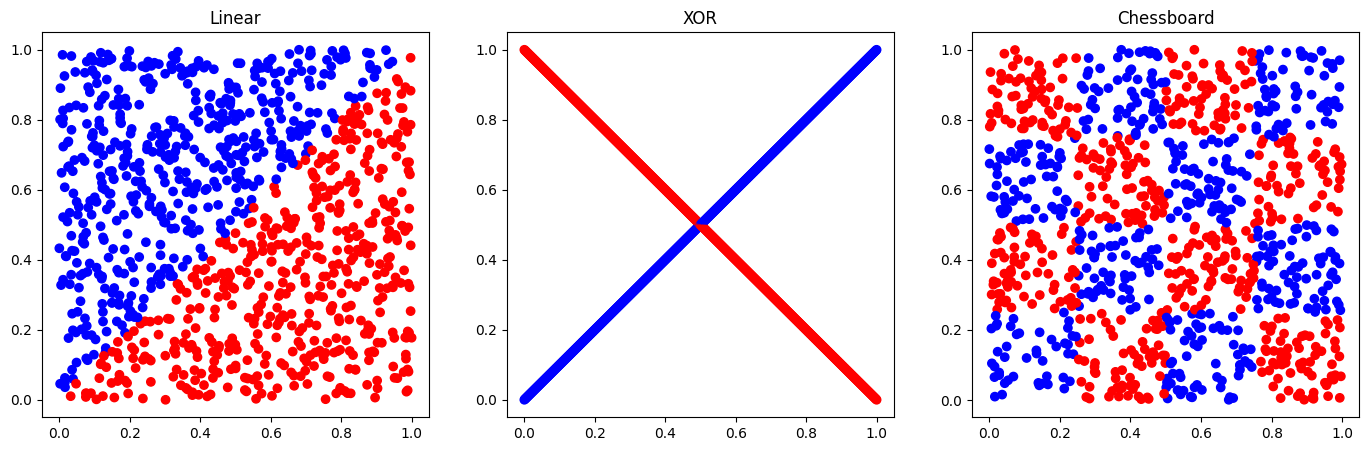

In [219]:
plt.figure(figsize=(17, 5))
for i, name in enumerate(['Linear', 'XOR', 'Chessboard']):
    data, label = GenData.fetch_data(name, 1000)
    plt.subplot(1,3,i+1)
    plt.scatter(data[:, 0], data[:, 1], c=label[:, 0], cmap=plt.cm.bwr)
    plt.title(name)

### Run "Linear"

Epochs 100: Loss = 7.994e-03
accuracy: 98.72094841020825 %
Epochs 200: Loss = 7.789e-03
accuracy: 98.87974224783778 %
Epochs 300: Loss = 5.429e-03
accuracy: 99.00925942582701 %
Epochs 400: Loss = 9.208e-03
accuracy: 99.09386321415045 %
Epochs 500: Loss = 4.823e-03
accuracy: 99.10920130161529 %
Epochs 600: Loss = 4.736e-03
accuracy: 99.17301797263075 %
Epochs 700: Loss = 4.500e-03
accuracy: 99.21102035308428 %
Epochs 800: Loss = 4.239e-03
accuracy: 99.18018651081492 %
Epochs 900: Loss = 4.063e-03
accuracy: 99.23968512209981 %
Epochs 1000: Loss = 3.948e-03
accuracy: 99.31401225830243 %
Training finished


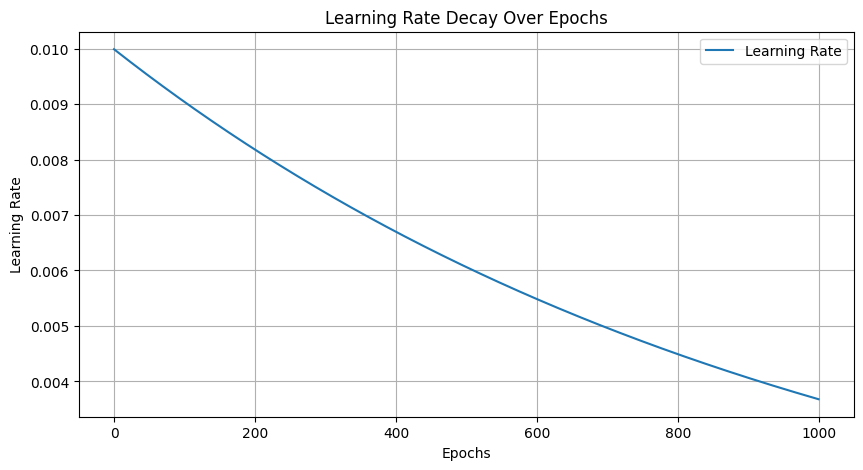

In [220]:
""" Customize your own code if needed """

Linear_data_train, Linear_label_train = GenData.fetch_data("Linear", 1000)

Linear_net = SimpleNet(1000)
Linear_net.train(Linear_data_train, Linear_label_train)

accuracy: 99.37682466148642 %


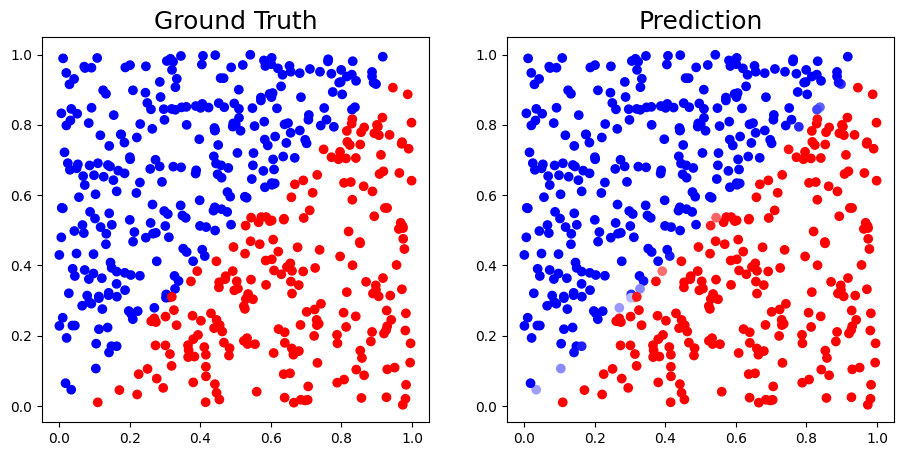

In [221]:
Linear_data_test, Linear_label_test = GenData.fetch_data("Linear", 500)
Linear_pred_result = Linear_net.forward(Linear_data_test)
Linear_pred_acc = Linear_net.test(Linear_data_test, Linear_label_test)
SimpleNet.plot_result(Linear_data_test, Linear_label_test, Linear_pred_result)

### Run "XOR"

Epochs 100: Loss = 1.813e-02
accuracy: 94.41208056797831 %
Epochs 200: Loss = 1.028e-02
accuracy: 97.37606490354861 %
Epochs 300: Loss = 8.639e-03
accuracy: 97.90986780627148 %
Epochs 400: Loss = 7.005e-03
accuracy: 98.25718246972083 %
Epochs 500: Loss = 6.142e-03
accuracy: 98.45370168498931 %
Epochs 600: Loss = 5.452e-03
accuracy: 98.58268190021097 %
Epochs 700: Loss = 5.174e-03
accuracy: 98.61832272689722 %
Epochs 800: Loss = 5.064e-03
accuracy: 98.7648092424308 %
Epochs 900: Loss = 4.808e-03
accuracy: 98.69407744963446 %
Epochs 1000: Loss = 4.451e-03
accuracy: 98.87899319258175 %
Training finished


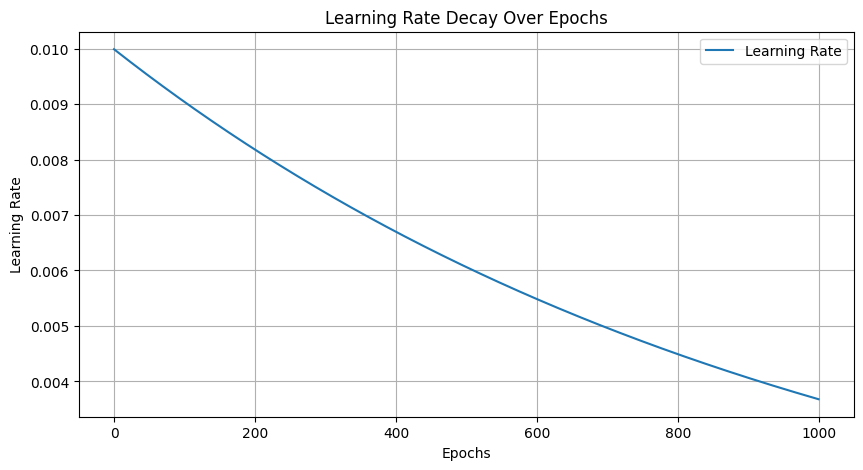

In [225]:
""" Customize your own code if needed """

XOR_data_train, XOR_label_train = GenData.fetch_data("XOR", 1000)

XOR_net = SimpleNet(1000)
XOR_net.train(XOR_data_train, XOR_label_train)

accuracy: 98.88289282493825 %


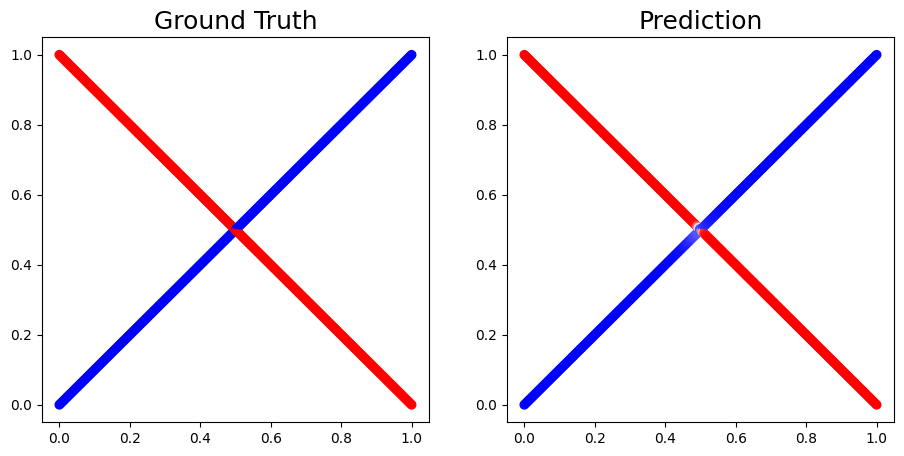

In [226]:
XOR_data_test, XOR_label_test = GenData.fetch_data("XOR", 500)
XOR_pred_result = XOR_net.forward(XOR_data_test)
XOR_pred_acc = XOR_net.test(XOR_data_test, XOR_label_test)
SimpleNet.plot_result(XOR_data_test, XOR_label_test, XOR_pred_result)

### Run "Chessboard"

Epochs 100: Loss = 1.798e-01
accuracy: 66.32767466055853 %
Epochs 200: Loss = 8.906e-02
accuracy: 79.48313441870593 %
Epochs 300: Loss = 6.114e-02
accuracy: 88.7802673422123 %
Epochs 400: Loss = 5.067e-02
accuracy: 91.42795137826812 %
Epochs 500: Loss = 4.334e-02
accuracy: 90.94011082758578 %
Epochs 600: Loss = 3.911e-02
accuracy: 93.18763436728634 %
Epochs 700: Loss = 3.216e-02
accuracy: 94.72271604241767 %
Epochs 800: Loss = 3.028e-02
accuracy: 94.48242980777776 %
Epochs 900: Loss = 2.472e-02
accuracy: 95.38411129792246 %
Epochs 1000: Loss = 2.180e-02
accuracy: 96.43022909136879 %
Epochs 1100: Loss = 1.883e-02
accuracy: 97.18096865634575 %
Epochs 1200: Loss = 1.896e-02
accuracy: 96.3968855965597 %
Epochs 1300: Loss = 1.398e-02
accuracy: 97.42416786538607 %
Epochs 1400: Loss = 1.469e-02
accuracy: 97.19916883675499 %
Epochs 1500: Loss = 1.094e-02
accuracy: 98.00070168663049 %
Epochs 1600: Loss = 1.019e-02
accuracy: 97.92328275692162 %
Epochs 1700: Loss = 1.015e-02
accuracy: 97.88637136

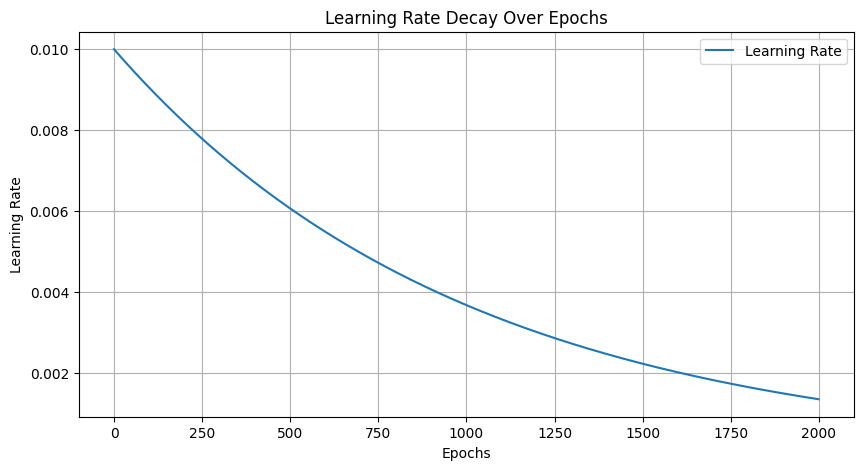

In [227]:
""" Customize your own code if needed """

Chessboard_data_train, Chessboard_label_train = GenData.fetch_data("Chessboard", 2000)

Chessboard_net = SimpleNet(2000)
Chessboard_net.train(Chessboard_data_train, Chessboard_label_train)


accuracy: 96.06699425206389 %


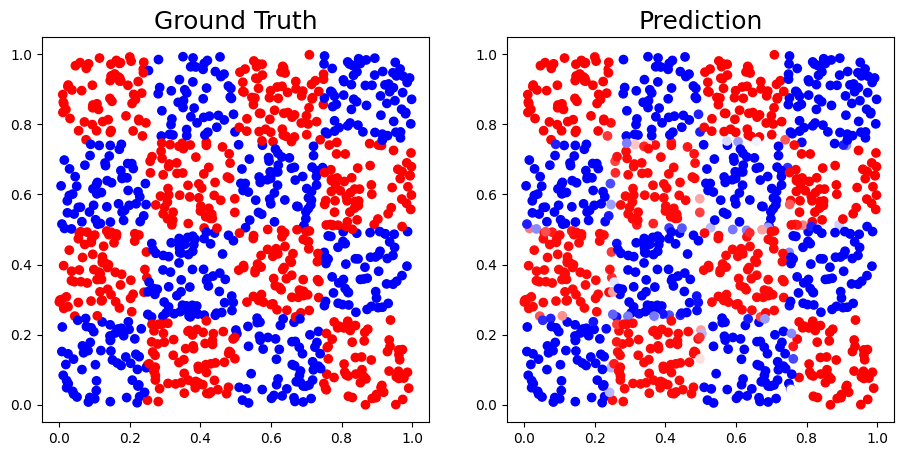

In [228]:
Chessboard_data_test, Chessboard_label_test = GenData.fetch_data("Chessboard", 1000)
Chessboard_pred_result = Chessboard_net.forward(Chessboard_data_test)
Chessboard_pred_acc = Chessboard_net.test(Chessboard_data_test, Chessboard_label_test)
SimpleNet.plot_result(Chessboard_data_test, Chessboard_label_test, Chessboard_pred_result)